In [1]:
# import the transcriptome data
import os
import dandelion as ddl
import pandas as pd
import scanpy as sc
sc.logging.print_header()

scanpy==1.6.0 anndata==0.7.4 umap==0.4.6 numpy==1.18.5 scipy==1.4.1 pandas==1.1.3 scikit-learn==0.23.2 statsmodels==0.12.0 python-igraph==0.7.1 leidenalg==0.8.2


In [2]:
ddl.__version__

'0.0.26'

In [3]:
os.getcwd()

'/lustre/scratch117/cellgen/team297/kt16/newcastle_covid/notebooks'

In [4]:
os.chdir('/lustre/scratch117/cellgen/team297/kt16/newcastle_covid')

In [5]:
# Read in B cell data
%time bdata = sc.read_h5ad('h5ad/combined_dec_bcells.h5ad')
# subset to only D0 
bdata = bdata[(bdata.obs['Collection_Day'] == 'D0')& (bdata.obs['bcr_QC_pass'] == 'True')].copy()
bdata

CPU times: user 6.48 s, sys: 737 ms, total: 7.22 s
Wall time: 17.2 s


/nfs/users/nfs_k/kt16/miniconda2/envs/dandelion/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead


AnnData object with n_obs × n_vars = 43841 × 1064
    obs: 'sample_id', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'initial_clustering', 'Resample', 'Collection_Day', 'patient_id', 'Sex', 'Age', 'Ethnicity', 'Swab_result', 'Status', 'Smoker', 'Status_on_day_collection', 'Status_on_day_collection_summary', 'Status_3_days_post_collection', 'Status_7_days_post_collection', 'Days_from_onset', 'Site', 'time_after_LPS', 'Worst_Clinical_Status', 'Outcome', 'filter_rna', 'has_bcr', 'filter_bcr_quality', 'filter_bcr_heavy', 'filter_bcr_light', 'bcr_QC_pass', 'filter_bcr', 'initial_clustering_B', 'leiden_B', 'leiden_B2', 'celltype_B', 'celltype_B_v2'
    var: 'feature_types', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'Site_colors', 'Status_on_day_collection_summary_colors', 'bcr_QC_pass_colors', 'celltype_B_colors', 'celltype_B_v2_colors', "dendrogram_['leiden_B']", "dendrogram_['leiden_B2']", 'filter_

In [6]:
# subset to each severity  classification
from collections import defaultdict
adata = defaultdict(dict)
vdj = defaultdict(dict)

In [7]:
# subset each status and place it in adata
for x in ['Healthy', 'Asymptomatic', 'Mild', 'Moderate', 'Severe', 'Critical', 'Non_covid', 'LPS']:
    adata[x] = bdata[bdata.obs['Status_on_day_collection_summary'] == x].copy()

In [8]:
vdj_files = {"Critical":'dandelion_output/combined_dec_bcell_vdj_critical.h5',
             "Severe":'dandelion_output/combined_dec_bcell_vdj_severe.h5',
             "Moderate":'dandelion_output/combined_dec_bcell_vdj_moderate.h5',
             "Mild":'dandelion_output/combined_dec_bcell_vdj_mild.h5',
             "LPS":'dandelion_output/combined_dec_bcell_vdj_lps.h5',
             "Non_covid":'dandelion_output/combined_dec_bcell_vdj_non_covid.h5',
             "Asymptomatic":'dandelion_output/combined_dec_bcell_vdj_asymptomatic.h5',
             "Healthy":'dandelion_output/combined_dec_bcell_vdj_healthy.h5',
             "Malignant":'dandelion_output/combined_dec_bcell_vdj_malignant.h5'}

In [9]:
# also read in the vdj objects
for x in ['Healthy', 'Asymptomatic', 'Mild', 'Moderate', 'Severe', 'Critical', 'Non_covid', 'LPS', 'Malignant']:
    vdj[x] = ddl.read_h5(vdj_files[x])

In [12]:
data = pd.DataFrame()
for x in vdj:
    data = data.append(vdj[x].metadata)

In [16]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [27]:
from dandelion.tools import extract_edge_weights
#  isotype_df = defaultdict(dict)

In [129]:
for x in ['Healthy', 'Asymptomatic', 'Mild', 'Moderate', 'Severe', 'Critical']:
    ddl.tl.transfer(adata[x], vdj[x])

converting matrices
Updating anndata slots
converting matrices
Updating anndata slots
converting matrices
Updating anndata slots
converting matrices
Updating anndata slots
converting matrices
Updating anndata slots
converting matrices
Updating anndata slots


In [28]:
if not os.path.exists('figures/bcr'):
    os.makedirs('figures/bcr')

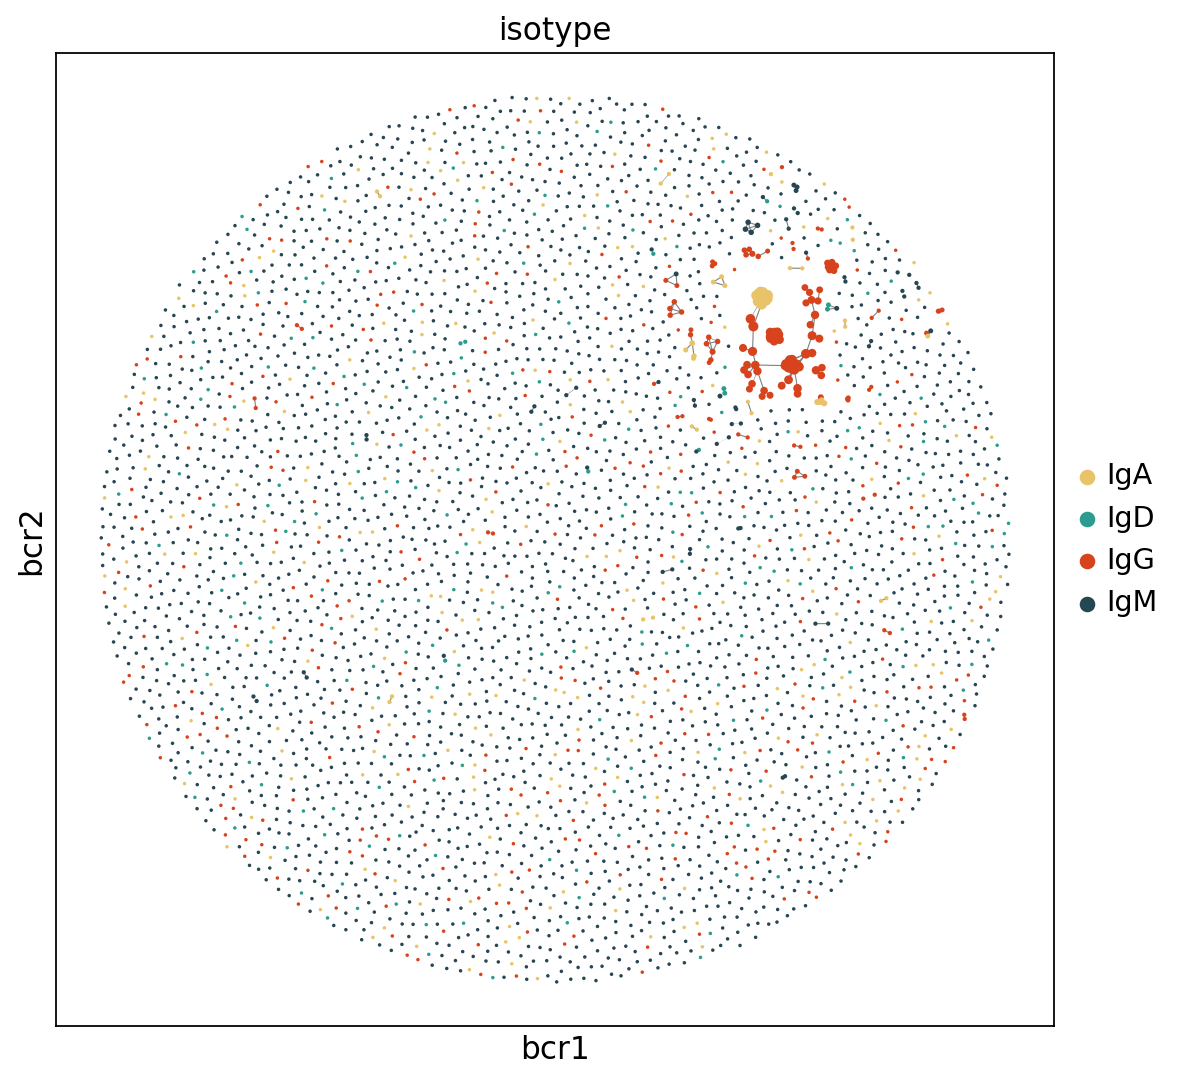

In [148]:
import numpy as np
sc.set_figure_params(figsize = [8,8], dpi_save = 900)
ddl.pl.clone_network(adata['Critical'], 
                     color = ['isotype'], 
                     palette = ['#264653', '#E9C369', '#2A9D8F', '#D7431D'], 
                     edges_width = [.5/(e+1) for e in extract_edge_weights(vdj['Critical'])],
                     size = adata['Critical'].obs['clone_centrality']*20000+10,
                     save = '/critical_dandelion.pdf')

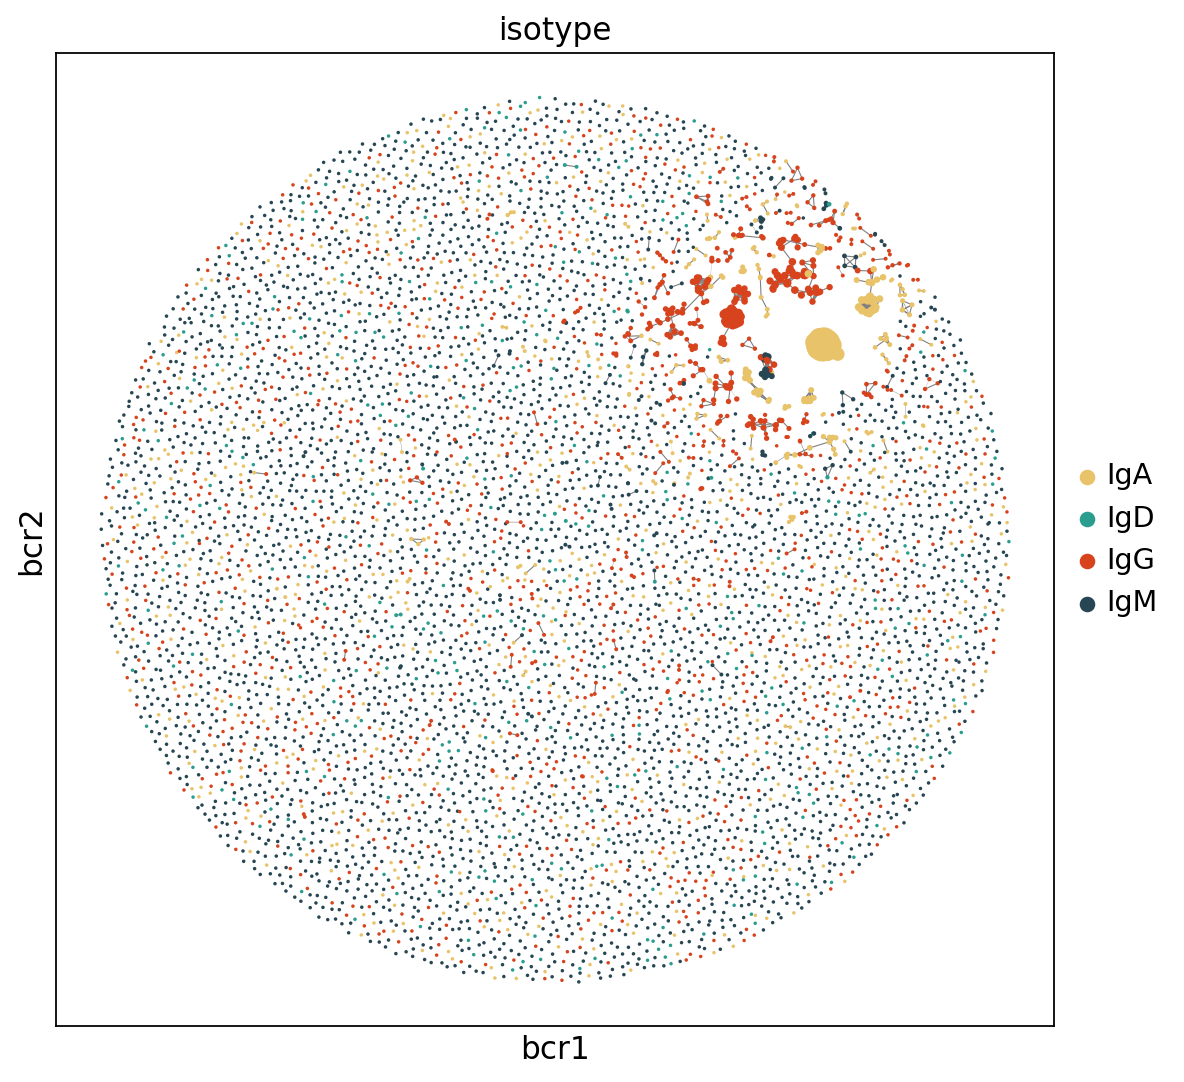

In [149]:
ddl.pl.clone_network(adata['Severe'], 
                     color = ['isotype'], 
                     palette = ['#264653', '#E9C369', '#2A9D8F', '#D7431D'],
                     edges_width = [.5/(e+1) for e in extract_edge_weights(vdj['Severe'])],
                     size = adata['Severe'].obs['clone_centrality']*20000+10,
                     save = '/severe_dandelion.pdf')

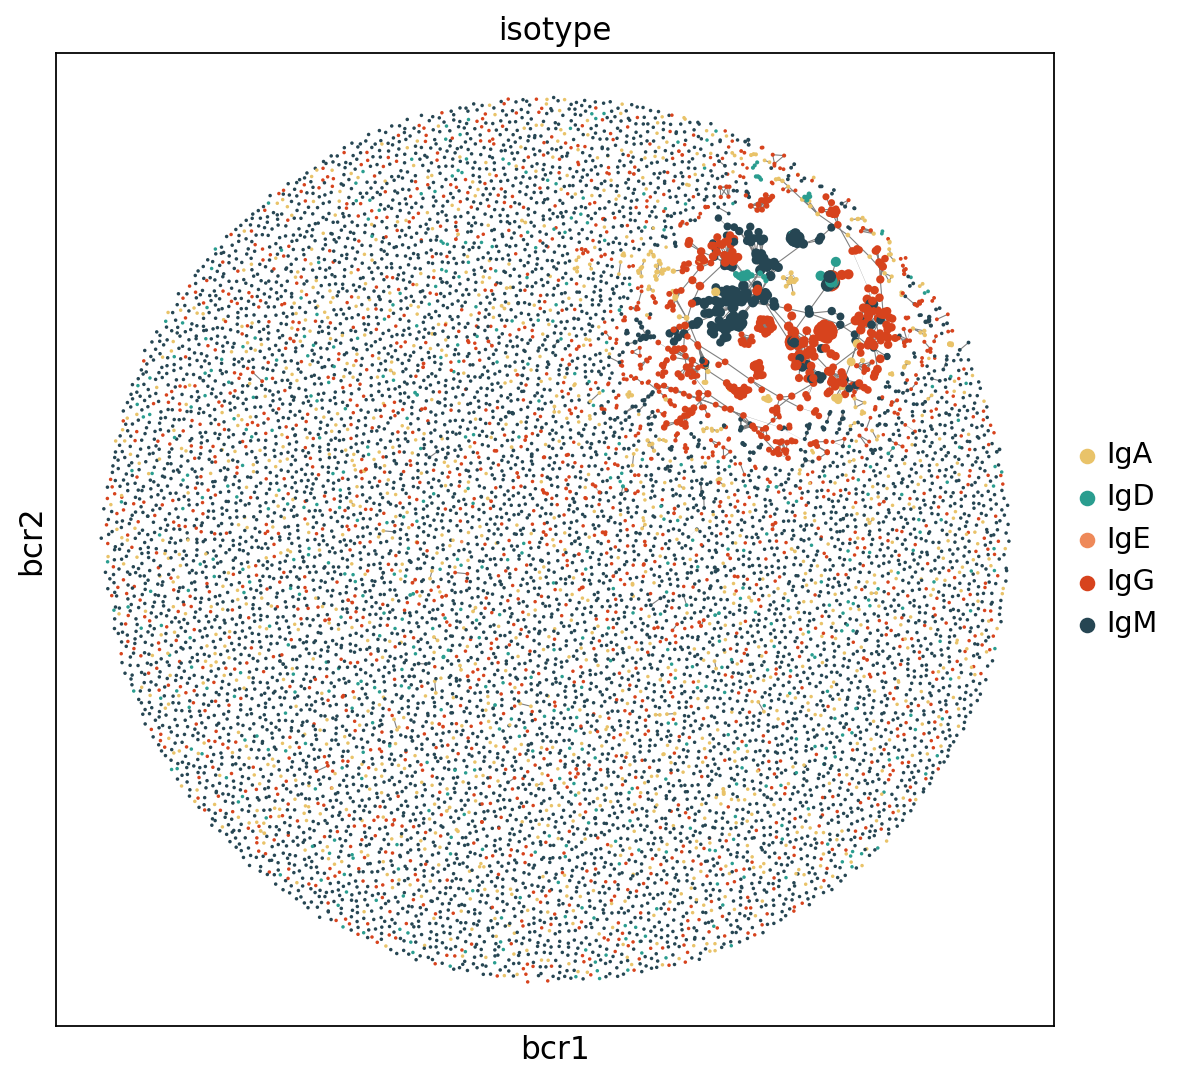

In [150]:
ddl.pl.clone_network(adata['Moderate'],
                     color = ['isotype'],
                     palette = ['#264653','#E9C369', '#2A9D8F', '#EE8959', '#D7431D'],
                     edges_width = [.5/(e+1) for e in extract_edge_weights(vdj['Moderate'])],
                     size = adata['Moderate'].obs['clone_centrality']*20000+10,
                     save = '/Moderate_dandelion.pdf')

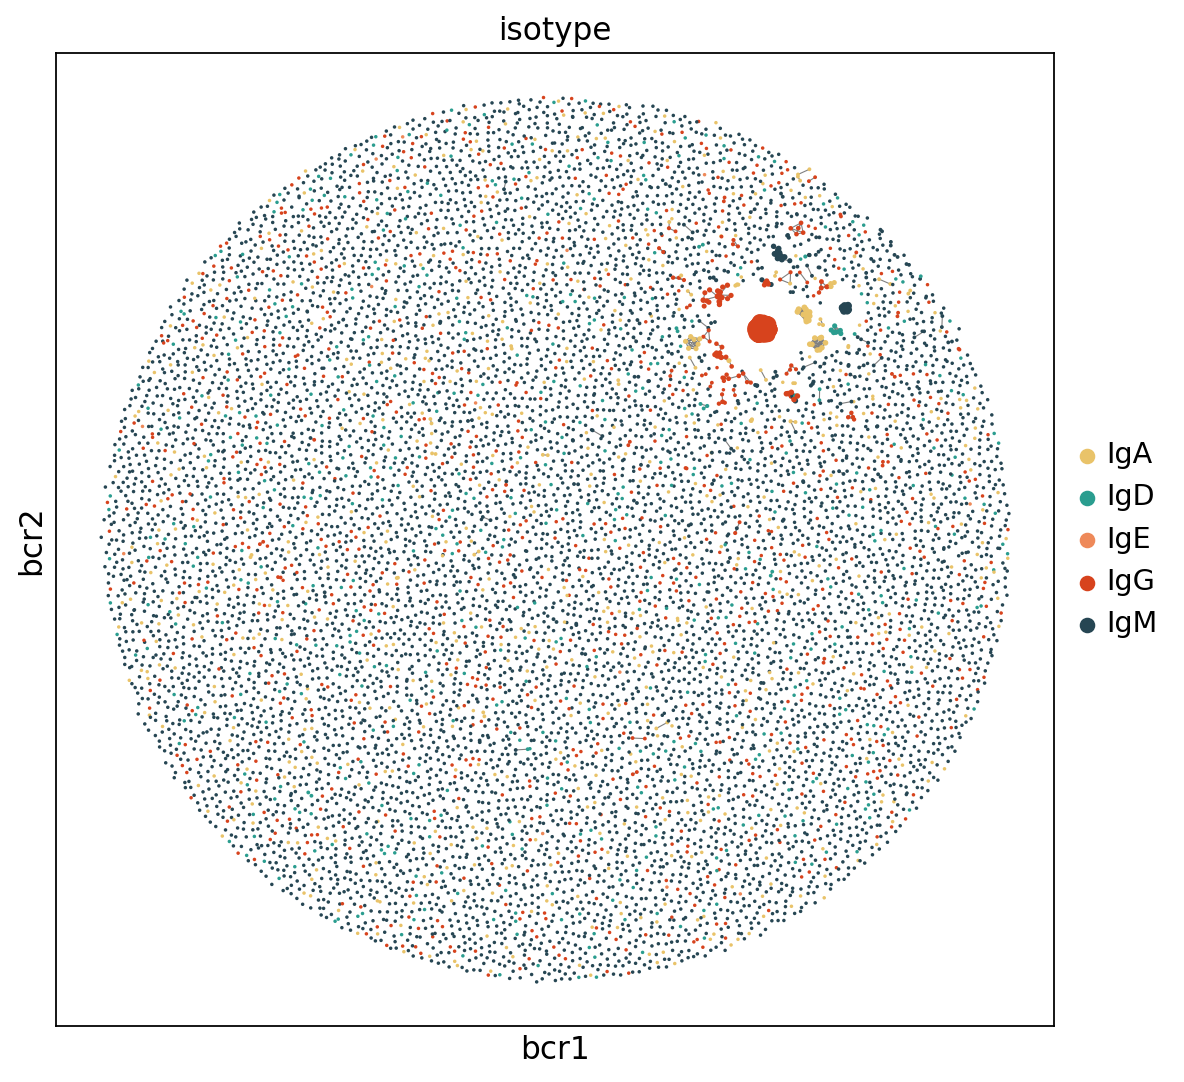

In [151]:
ddl.pl.clone_network(adata['Mild'],
                     color = ['isotype'],
                     palette = ['#264653', '#E9C369', '#2A9D8F', '#EE8959', '#D7431D'],
                     edges_width = [.5/(e+1) for e in extract_edge_weights(vdj['Mild'])],
                     size = adata['Mild'].obs['clone_centrality']*20000+10,
                     save = '/Mild_dandelion.pdf')

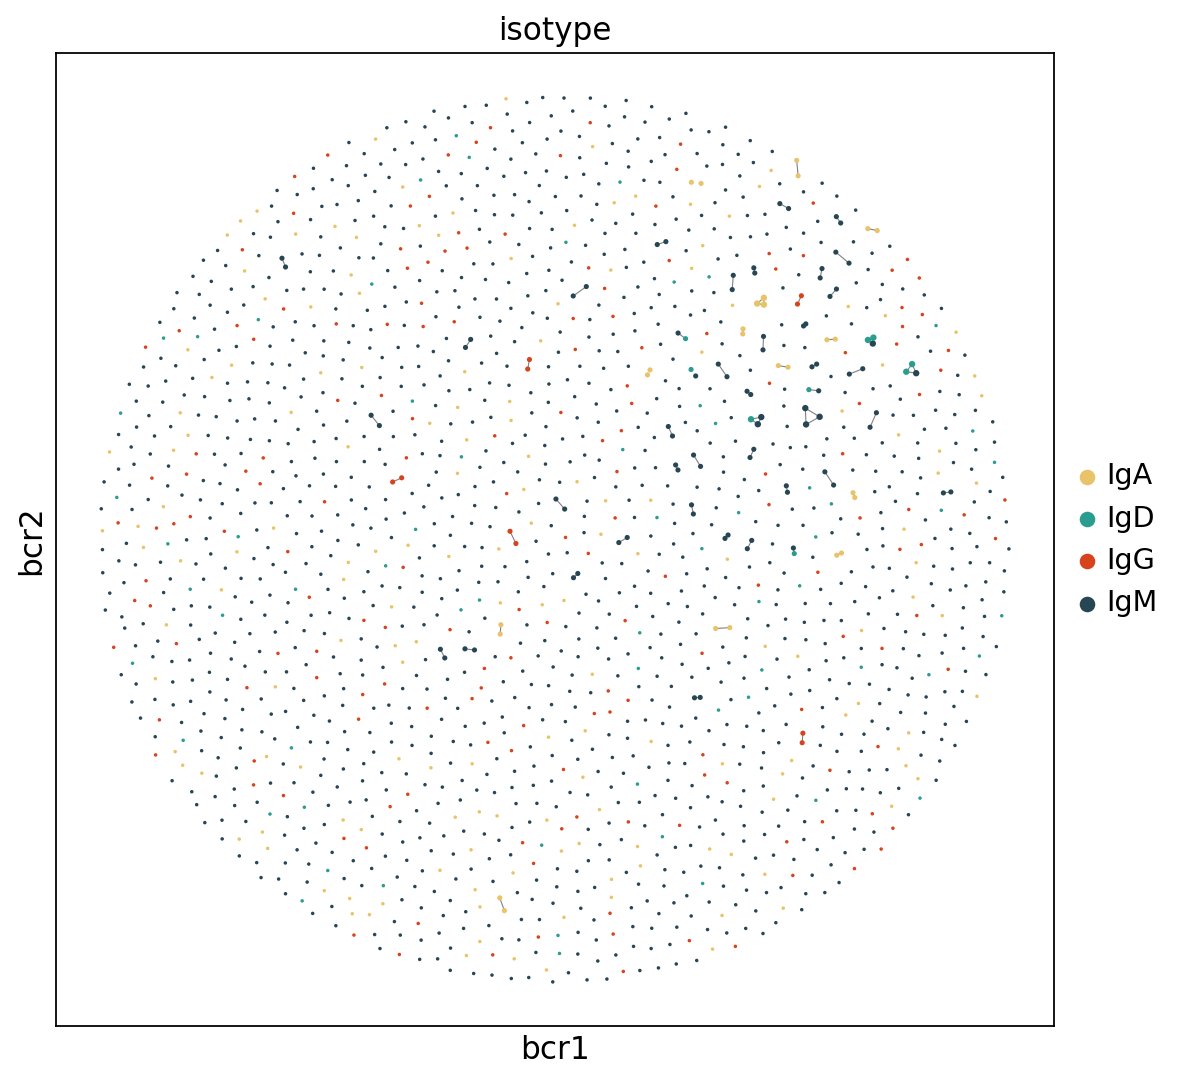

In [152]:
ddl.pl.clone_network(adata['Asymptomatic'],
                     color = ['isotype'],
                     palette = ['#264653', '#E9C369', '#2A9D8F', '#D7431D'],
                     edges_width = [.5/(e+1) for e in extract_edge_weights(vdj['Asymptomatic'])],
                     size = adata['Asymptomatic'].obs['clone_centrality']*20000+10,
                     save = '/Asymptomatic_dandelion.pdf')

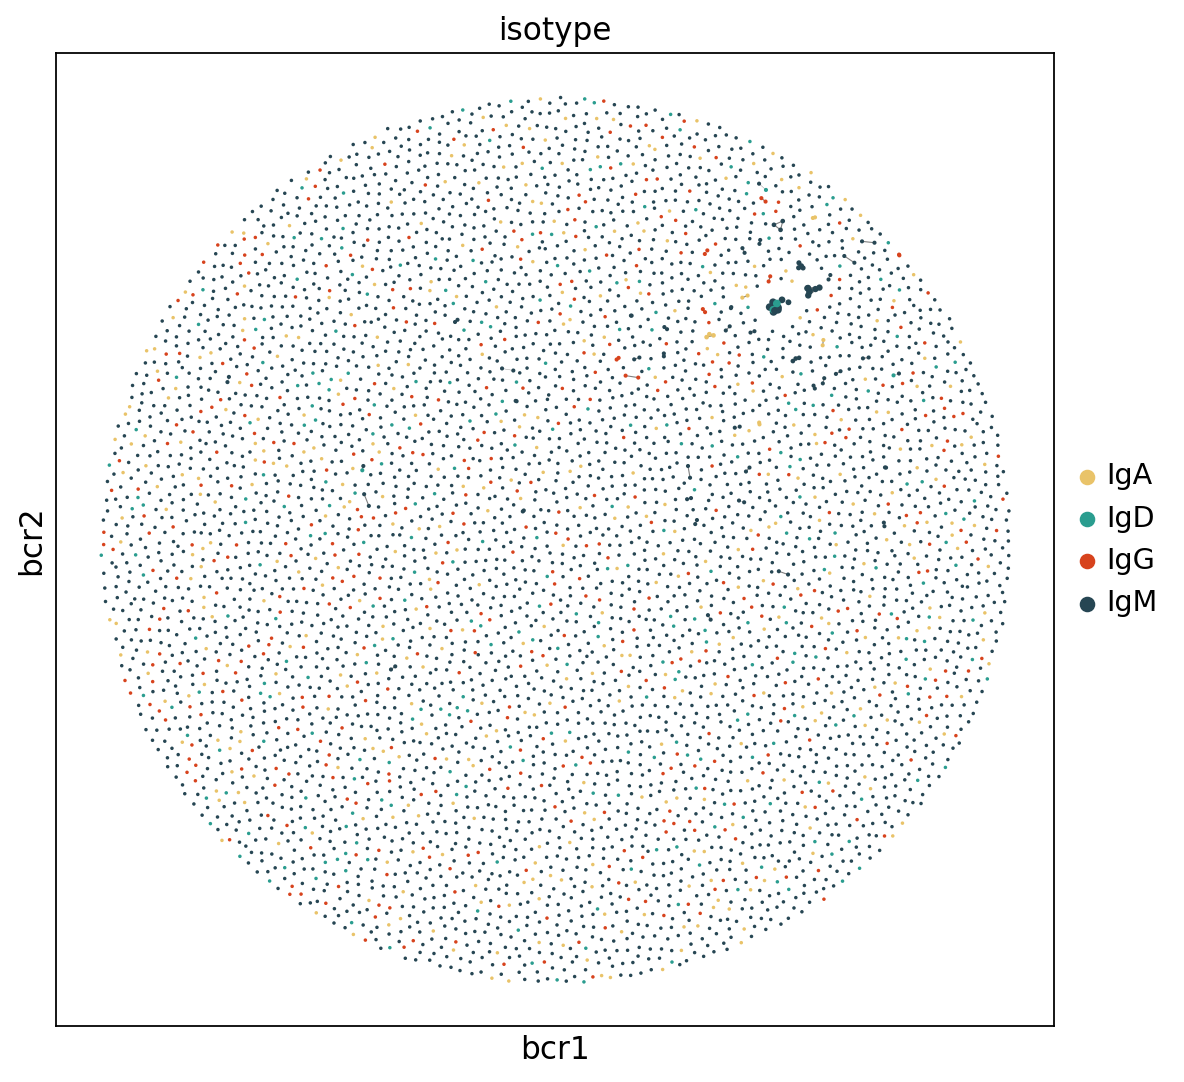

In [153]:
ddl.pl.clone_network(adata['Healthy'],
                     color = ['isotype'],
                     palette = ['#264653','#E9C369', '#2A9D8F', '#D7431D'],
                     edges_width = [.5/(e+1) for e in extract_edge_weights(vdj['Healthy'])],
                     size = adata['Healthy'].obs['clone_centrality']*20000+10,
                     save = '/Healthy_dandelion.pdf')